# <div align = "center">Applied Data Science Capstone, Week 2<br>Part 2: Regression Model</div>

In this code I will develop a regression model to determine the restaurant rating based on the neighbourhood and its category.

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('ratings.csv')
df.head()

,nbh_num,cat_1,cat_2,price_tier,likes,rating,CAD / ft²·month,Neighbourhood,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,1,Chinese Restaurant,Buffet,1,37,7.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
1,1,Burger Joint,None,1,5,7.1,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
2,1,Mediterranean Restaurant,Turkish Restaurant,2,6,6.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
3,1,Sandwich Place,Fast Food Restaurant,1,1,6.2,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066
4,1,Restaurant,None,2,17,6.6,4.015792,West Humber-Clairville,33312,1117,5060,5445,13845,3990,4980,615,28066


In [3]:
#Create the features used for the model, drop colums that will not be used:
df.drop(['cat_2', 'Neighbourhood'], axis = 1, inplace = True)

In [4]:
df.head()

,nbh_num,cat_1,price_tier,likes,rating,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,1,Chinese Restaurant,1,37,7.2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
1,1,Burger Joint,1,5,7.1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
2,1,Mediterranean Restaurant,2,6,6.2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
3,1,Sandwich Place,1,1,6.2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
4,1,Restaurant,2,17,6.6,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066


In [204]:
X = df.iloc[:,range(5,15)]
X.insert(0, 'nbh_num', df.nbh_num)
X.head()

,nbh_num,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($)
0,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
1,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
2,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
3,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066
4,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066


In [203]:
Y = df.rating.to_frame(name = 'rating')
Y.head()

,rating
0,7.2
1,7.1
2,6.2
3,6.2
4,6.6


In [125]:
X_coded = X.join(pd.get_dummies(df[['cat_1']], prefix="", prefix_sep=""), how = 'left')

In [202]:
X_coded.head()

,nbh_num,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),...,Seafood Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Xinjiang Restaurant
0,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
1,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
2,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
3,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0
4,1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Define a function to evaluate the models, based on the input data:
def get_model(x_tr, y_tr, x_te, y_te, color):
    lm = LinearRegression()
    lm.fit(x_tr, y_tr)
    yhat = lm.predict(x_te)
    ax1 = sns.distplot(y_te, hist = False, color = 'r', label = 'Test Values')
    sns.distplot(yhat, hist = False, color = color, label = 'Predicted Values', ax = ax1)
    print('MSE: ', mean_squared_error(y_te, yhat), '\nR2 Score: ', r2_score(y_te, yhat))

In [282]:
#Getting the baseline model
#Split the data in training data and testing data:
x_train, x_test, y_train, y_test = train_test_split(X_coded, Y, test_size = 0.2, random_state = 1)

MSE:  0.6245765758279755 
R2 Score:  0.23268656754914796


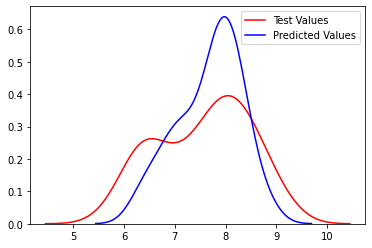

In [283]:
get_model(x_train, y_train, x_test, y_test, 'blue')

The model is doing poorly with the current features, I will now add polynomial features to try to improve accuracy

In [249]:
#Defining the polynomial feature:
pr = PolynomialFeatures(degree = 2)

In [250]:
#Tranforming the X training and test data:
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

MSE:  81.43805021105243 
R2 Score:  -99.04939707626565


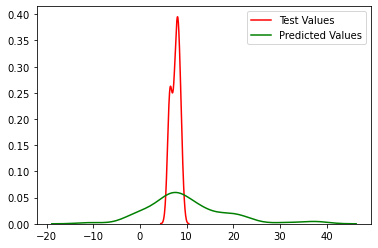

In [251]:
get_model(x_train_pr, y_train, x_test_pr, y_test, 'green')

It seems the model is too flexible including the restaurant categories. I will try a polynomial regression without using the encoded categorical values

In [252]:
#Make a new split of the data using the X dataframe, without one hot encoding:
x_train_nc, x_test_nc, y_train_nc, y_test_nc = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [253]:
#Create the polynomial features on the X data frame:
pr_2 = PolynomialFeatures(degree = 2)
x_train_nc_pr = pr_2.fit_transform(x_train_nc)
x_test_nc_pr = pr_2.fit_transform(x_test_nc)

MSE:  1.6955593187442308 
R2 Score:  -1.0830519285244535


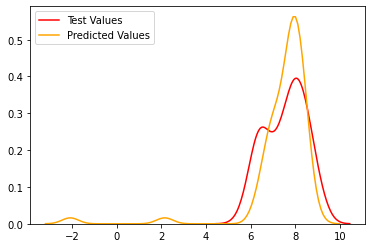

In [254]:
get_model(x_train_nc_pr, y_train_nc, x_test_nc_pr, y_test_nc, 'orange')

In [317]:
def ridge_model(x_tr, y_tr, x_ts, y_ts, alpha, color):
    rm = Ridge(alpha = alpha)
    rm.fit(x_tr, y_tr)
    yhat = rm.predict(x_ts)
    ax1 = sns.distplot(y_ts, hist = False, color = 'r', label = 'Test Values')
    sns.distplot(yhat, hist = False, color = color, label = 'Predicted Values', ax = ax1)
    print('MSE: ', mean_squared_error(y_ts, yhat), '\nR2 Score: ', rm.score(x_ts, y_ts))

MSE:  0.6177785253389791 
R2 Score:  0.24103820233111373


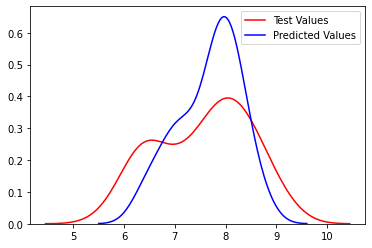

In [318]:
#Use ridge regression
ridge_model(x_train, y_train, x_test, y_test, 0.1, 'blue')

In [256]:
sc = StandardScaler()

In [257]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc =  sc.fit_transform(x_test)

MSE:  0.656646308044701 
R2 Score:  0.19328781764826664


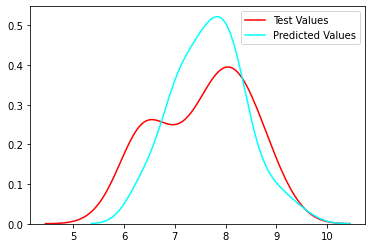

In [258]:
get_model(x_train_sc, y_train, x_test_sc, y_test, 'cyan')

MSE:  0.6125431923157034 
R2 Score:  0.2474699858906999


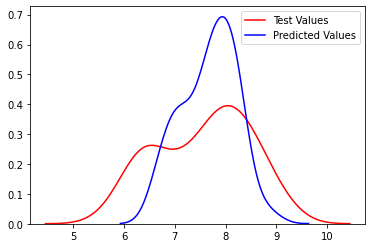

In [288]:
ridge_model(x_train_sc, y_train, x_test_sc, y_test, 0.1, 'blue')

Generate a frame with one-hot encoding on the neighbourhoods, instead of label encoding:

In [260]:
df2 = pd.read_csv('ratings.csv')

In [322]:
#Reuse the X_coded dataframe,dropping the nieghbourhood label encoding:
x_onehot = X_coded.drop('nbh_num', axis = 1)

In [323]:
x_onehot.head()

,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($),...,Seafood Restaurant,Steakhouse,Sushi Restaurant,Syrian Restaurant,Taco Place,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Xinjiang Restaurant
0,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,0,0,0,0,0,0,0,0,0,0
1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,0,0,0,0,0,0,0,0,0,0
2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,0,0,0,0,0,0,0,0,0,0
3,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,0,0,0,0,0,0,0,0,0,0
4,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,0,0,0,0,0,0,0,0,0,0


In [324]:
x_onehot = x_onehot.join(pd.get_dummies(df2[['Neighbourhood']], prefix="", prefix_sep=""))
x_onehot.head()

,CAD / ft²·month,Population 2016,Population density per square kilometre,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),After-tax income: Average amount ($),...,West Humber-Clairville,Weston,Weston-Pelham Park,Willowdale East,Woburn,Woodbine Corridor,Wychwood,Yonge-Eglinton,York University Heights,Yorkdale-Glen Park
0,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,1,0,0,0,0,0,0,0,0,0
1,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,1,0,0,0,0,0,0,0,0,0
2,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,1,0,0,0,0,0,0,0,0,0
3,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,1,0,0,0,0,0,0,0,0,0
4,4.015792,33312,1117,5060,5445,13845,3990,4980,615,28066,...,1,0,0,0,0,0,0,0,0,0


In [325]:
#Split the one hot encoded dataframe:
x_train_oh, x_test_oh, y_train_oh, y_test_oh = train_test_split(x_onehot, Y, test_size = 0.2, random_state = 1)

MSE:  850485688616088.0 
R2 Score:  -1044850412645120.0


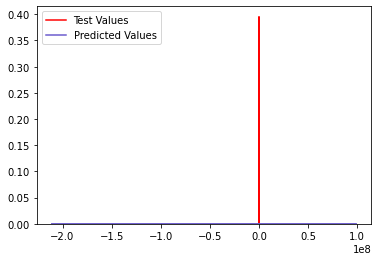

In [326]:
get_model(x_train_oh, y_train_oh, x_test_oh, y_test_oh, 'slateblue')

MSE:  0.5584768787817405 
R2 Score:  0.31389227936642483


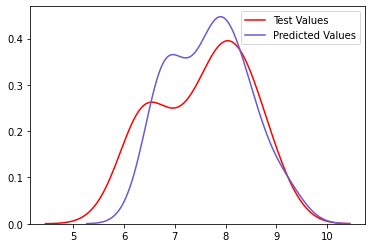

In [343]:
ridge_model(x_train_oh, y_train_oh, x_test_oh, y_test_oh, 0.1, 'slateblue')

Using ridge regression with all categorical data encoded using one-hot encoding has improved the model. I will now use gridsearch to get the best estimator.

In [344]:
parameters1= [{'alpha': [0.01,0.1,1, 1.5, 2, 2.5, 3, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]}]
parameters1

[{'alpha': [0.01, 0.1, 1, 1.5, 2, 2.5, 3, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5]}]

In [345]:
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [346]:
Grid1.fit(x_train_oh, y_train_oh)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.01, 0.1, 1, 1.5, 2, 2.5, 3, 3.5, 4.0, 4.5,
                                    5.0, 5.5, 6.0, 6.5]}])

In [350]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=1.5)

In [348]:
BestRR.score(x_test_oh, y_test_oh)

0.47620729667136563

MSE:  0.42635595736118126 
R2 Score:  0.47620729667136563


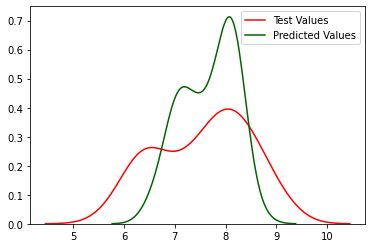

In [352]:
ridge_model(x_train_oh, y_train_oh, x_test_oh, y_test_oh, 1.5, 'darkgreen')

Let's make a prediction for a particular neighbourhood and restaurant category:

In [374]:
def get_prediction_array(nbh_number, category):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-374-1944de7955f1>, line 2)

In [371]:
BestRR.predict(np.array(x_test_oh.loc[58,:]).reshape(1,-1))

array([[7.14867158]])

In [370]:
np.array(x_test_oh.loc[58,:]).reshape(1,-1)

array([[1.5000e+00, 1.6934e+04, 3.1480e+03, 2.1150e+03, 2.1700e+03,
        6.0600e+03, 2.2650e+03, 4.3050e+03, 6.3000e+02, 3.4203e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [375]:
df[df['nbh_num', 'Neighbourhood']]

KeyError: ('nbh_num', 'Neighbourhood')